# Leopard challenge Classification

## Загрузка данных
Данные беру из leopard-challenge-classification.zip
https://drive.google.com/file/d/1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7/view?usp=sharing

# Colab

In [1]:
! gdown --id 1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/leopard-challenge-classification.zip -d /content/leopard-challenge-classification/

In [9]:
! unzip / content / leopard-challenge-classification.zip -d / content / leopard_challenge_classification /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [32]:
import pandas as pd

In [1]:
df = pd.read_csv('/content/leopard_challenge_classification/train.csv')

NameError: name 'pd' is not defined

In [1]:
df.head()

NameError: name 'train' is not defined

In [ ]:
!pip install phik

!pip install feature_engine

!pip install catboost

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('leopard-challenge-classification.zip', 'r') as zf:
    zf.extractall()

# 1. Задача

Дан набор данных с основными клиническими показателями людей.
Каждая строчка в датасете - клинические показатели одного человека - рост, вес, зрение и т.д.
**Задача:** Определить, курит человек или нет, на основании его показателей.

# 2. Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import phik
import folium
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.imputation import RandomSampleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, log_loss
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
# plt.style.use('dark_background')
plt.style.use('seaborn-colorblind')
pd.set_option('display.max_columns', 100)

# 3. Загрузка Датасета

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [4]:
df.shape

(13863, 26)

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [7]:
df_test.shape

(5942, 25)

# 4. Получение информации о Датасете

## 4.1 Подготовка таблиц

### Перевод названий колонок в строчные буквы и замена пробелов

In [8]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [9]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()
df_test.columns = df_test.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()

## 4.2 Основная информация о датасете

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height_cm_           13863 non-null  int64  
 3   weight_kg_           13863 non-null  int64  
 4   waist_cm_            13863 non-null  float64
 5   eyesight_left_       13863 non-null  float64
 6   eyesight_right_      13863 non-null  float64
 7   hearing_left_        13863 non-null  float64
 8   hearing_right_       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5942 non-null   int64  
 1   age                  5942 non-null   int64  
 2   height_cm_           5942 non-null   int64  
 3   weight_kg_           5942 non-null   int64  
 4   waist_cm_            5942 non-null   float64
 5   eyesight_left_       5942 non-null   float64
 6   eyesight_right_      5942 non-null   float64
 7   hearing_left_        5942 non-null   float64
 8   hearing_right_       5942 non-null   float64
 9   systolic             5942 non-null   float64
 10  relaxation           5942 non-null   float64
 11  fasting_blood_sugar  5942 non-null   float64
 12  cholesterol          5942 non-null   float64
 13  triglyceride         5942 non-null   float64
 14  hdl                  5942 non-null   float64
 15  ldl                  5942 non-null   f

## 4.3 Пропущенные значения

In [12]:
df.isna().mean().sort_values(ascending=False)

id                     0.0
age                    0.0
tartar                 0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
triglyceride           0.0
cholesterol            0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
smoking                0.0
dtype: float64

In [13]:
df_test.isna().mean().sort_values(ascending=False)

id                     0.0
triglyceride           0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
cholesterol            0.0
age                    0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
tartar                 0.0
dtype: float64

**Пропуски в данных отсутствуют!!**

## 4.4 Дубликаты

In [14]:
df.duplicated().sum()

0

In [15]:
df_test.duplicated().sum()

0

**Дубликаты отсутствуют!**

## 4.5 Числовые переменные

## 4.6 Категориальные переменные

# 5.EDA

## 5.1 Phik взаимосвязь

## 5.2 Корреляция признаков

## 5.3 Количественные признаки

#### Функция гистограммы и описания для количественных признаков

In [16]:
def hist_box_describe_num(ds, x):
    print(ds[x].describe())
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=ds, x=ds[x], kde=True);
    plt.subplot(1, 2, 2)
    sns.boxplot(data=ds, y=ds[x]);

## 5.4 Категориальные переменные

# 6. Preprocessing

## 6.1 Удаление выбросов

### Waist - окружность талии

У половины пациентов окружность талии составляет от 79 до 90 см
**Выбросы в сравнении с тестом:** 2 пациента > 121

In [17]:
df = df.query('waist_cm_ < 121')

### Systolic - систолическое давление

У половины пациентов систолическое давление находится в пределах от 115 до 131
**Выбросы в сравнении с тестом:** ВСЕГО 3 - 1 пациент > 200, 2 пациента < 85

In [18]:
df = df.query('systolic < 200 & systolic > 85')

У половины пациентов диастолическое давление находится в пределах от 70 до 83
**Выбросы в сравнении с тестом:** ВСЕГО 2 - 1 пациент > 133, 1 пациент < 45

In [19]:
df = df.query('relaxation < 135 & relaxation > 45')

### Fasting blood sugar - Сахар в крови

У половины пациентов сахар в крови находится в пределах от 90 до 104
**Выбросы в сравнении с тестом:** Всего 2 - 1 пациент > 400, 1 пациент < 50

In [20]:
df = df.query('fasting_blood_sugar < 400 & fasting_blood_sugar > 50')

### Cholesterol - холестерин

У половины пациентов холестерин находится в пределах от 169 до 216
**Выбросы в сравнении с тестом:** 2 пациента > 400,

In [21]:
df = df.query('cholesterol < 400')

### Triglyceride - триглицерид

У половины пациентов триглицерид находится в пределах от 78 до 166
**Выбросы в сравнении с тестом:** 6 пациентов < 20,

In [22]:
df = df.query('triglyceride > 20')

### HDL - холестерин липопротеинов высокой плотности

У половины пациентов холестерин липопротеинов находится в пределах от 45 до 61
**Выбросы в сравнении с тестом:** Всего 4 - 1 пациент > 160, 3 пациента < 20,

In [23]:
df = df.query('hdl < 160 & hdl > 20')

### LDL - липопротеины низкой плотности

У половины пациентов липопротеины находится в пределах от 91 до 135
**Выбросы в сравнении с тестом:** Всего 9 - 6 пациентов > 1100, 3 пациента < 10,

In [24]:
df = df.query('ldl < 1100 & ldl > 10')

### Hemoglobin - гемоглобин

У половины пациентов гемоглобин находится в пределах от 14.8 до 16.1
**Выбросы в сравнении с тестом:** Всего 9 - 3 пациента > 19.4, 6 пациентов < 8.6,

In [25]:
df = df.query('hemoglobin < 19.4 & hemoglobin > 8.6')

### Serum creatinine - Сывороточный креатинин

У половины пациентов сывороточный креатинин находится в пределах от 0.9 до 1.1
**Выбросы в сравнении с тестом:** 10 пациентов > 2.6

In [26]:
df = df.query('serum_creatinine < 2.6')

### AST - Аспартатаминотрансфераз

У половины пациентов Аспартатаминотрансфераз находится в пределах от 20 до 30
**Выбросы в сравнении с тестом:** Всего 4 - 3 пациента > 600, 1 пациент < 8

In [27]:
df = df.query('ast < 600 & ast > 8')

### ALT - Аланинаминотрансфераза

У половины пациентов Аланинаминотрансфераза находится в пределах от 18 до 35
**Выбросы в сравнении с тестом:** Всего 3 - 1 пациента > 1600, 2 пациента < 3

In [28]:
df = df.query('alt < 1600 & alt > 3')

### Итого:

Из обучающего выборки было дропнуто 54 переменные, что составляет 0.3% от обучающей выборки.

In [29]:
df.shape

(13809, 26)

## 6.2 Список всех фич

Сразу удаляю фичу oral, т.к. она не несёт полезной информации

In [30]:
X = df.drop(['oral', 'smoking'], axis=1)
y = df.smoking
cat_features = ['tartar']
df_test = df_test.drop('oral', axis=1)

In [31]:
X.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,0,N
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,0,Y
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,0,Y
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,0,Y
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,0,Y


In [32]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: smoking, dtype: int64

In [33]:
cat_features

['tartar']

In [34]:
ввввввввввввввввв

NameError: name 'ввввввввввввввввв' is not defined

# 7. Modeling

## Baseline catboost

### Обучающая и тестовая выборки

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

### Составаляю список фичей
В baselin`е оставлю все фичи

In [36]:
X.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,0,N
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,0,Y
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,0,Y
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,0,Y
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,0,Y


In [37]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: smoking, dtype: int64

In [38]:
cat_features

['tartar']

### Создание Pool`ов для модели

In [39]:
train_data = Pool(X_train, y_train, cat_features=cat_features)
test_data = Pool(X_test, y_test, cat_features=cat_features)
full_data = Pool(X, y, cat_features=cat_features)

### Baseline model

### Настройка гиперпараметров

In [40]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100}

In [41]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [42]:
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057358
0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 167ms	remaining: 2m 47s
100:	learn: 0.1305785	test: 0.0721649	best: 0.0753425 (95)	total: 1.25s	remaining: 11.1s
200:	learn: 0.2581386	test: 0.1412520	best: 0.1417069 (192)	total: 2.13s	remaining: 8.45s
300:	learn: 0.3652738	test: 0.1528861	best: 0.1555210 (299)	total: 3.39s	remaining: 7.88s
400:	learn: 0.4467354	test: 0.1834862	best: 0.1884498 (397)	total: 4.26s	remaining: 6.36s
500:	learn: 0.5243863	test: 0.2021116	best: 0.2021116 (500)	total: 5.03s	remaining: 5s
600:	learn: 0.5752296	test: 0.2130178	best: 0.2202381 (560)	total: 5.79s	remaining: 3.84s
700:	learn: 0.6254211	test: 0.2228739	best: 0.2290749 (649)	total: 6.66s	remaining: 2.84s
800:	learn: 0.6721845	test: 0.2296512	best: 0.2299854 (799)	total: 7.58s	remaining: 1.88s
900:	learn: 0.7108814	test: 0.2388489	best: 0.2439024 (882)	total: 8.54s	remaining: 938ms
999:	learn: 0.7518086	test: 0.2478386	best: 0.2536023 (981)	total: 9.34s	rema

### Feature importance

In [43]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,8.834458
1,triglyceride,7.950693
2,waist_cm_,6.008348
3,alt,5.976088
4,age,5.889109
5,hemoglobin,5.818823
6,fasting_blood_sugar,5.496671
7,ldl,5.457218
8,hdl,5.398105
9,id,5.303189


### Прогнозирование

#### Скоры

In [44]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,Y
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,N
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,Y
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,Y
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,N


Создаю колонку для baseline catboost скора

In [45]:
df_test['baseline_cat_score'] = model.predict_proba(df_test)[:, 1]

In [46]:
df_test.baseline_cat_score

0       0.255018
1       0.005462
2       0.091356
3       0.123879
4       0.146871
          ...   
5937    0.123238
5938    0.087776
5939    0.063296
5940    0.164997
5941    0.310199
Name: baseline_cat_score, Length: 5942, dtype: float64

Распределение вероятностей (Score) курит или не курит

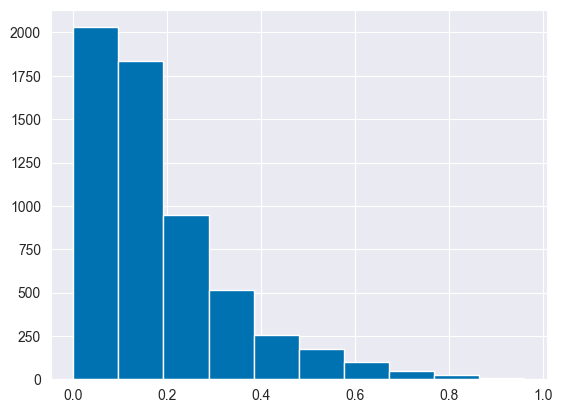

In [47]:
df_test.baseline_cat_score.hist();

#### Пороги

Посмотрю на пользователей вероятность курения которых > 0.5
Для вывода 0-ей и 1-иц нужно домножить на 1 иначе будет True и False

In [48]:
((df_test.baseline_cat_score > 0.5) * 1).mean()

0.05116122517670818

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [49]:
model.predict(df_test).mean()

0.05116122517670818

В обучающем ДФ процент курильщиков ≈20% что существенно выше. ПО этому есть смысл понижать порог, но в Baselin`е оставлю порог по умолчанию

In [50]:
df.smoking.mean()

0.20204214642624374

In [51]:
df_test['baseline_cat_pred'] = (df_test.baseline_cat_score > 0.5) * 1

In [52]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,baseline_cat_score,baseline_cat_pred
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,Y,0.255018,0
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,N,0.005462,0
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,Y,0.091356,0
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,Y,0.123879,0
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,N,0.146871,0


### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred
submission.to_csv('Baseline_LR_0.47.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.23 LR=auto, 0.3117 LR = 0.45

## Catboost V2 Thresholds

### Изменение порога

Изменю порог с 0.5 на 0.25

In [53]:
((df_test.baseline_cat_score > 0.25) * 1).mean()

0.23813530797711208

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.25) * 1
submission.to_csv('Baseline_threshold0.25_LR1.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.4175 ↑ LR = 0.45

### Изменение порога

Изменю порог с 0.25 на 0.2

In [54]:
((df_test.baseline_cat_score > 0.20) * 1).mean()

0.3343991921911814

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.2) * 1
submission.to_csv('Baseline_threshold0.2_LR0.47.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.42861 ↑↑↑ LR = 0.45

### Изменение порога

Изменю порог с 0.2 на 0.1

In [55]:
((df_test.baseline_cat_score > 0.1) * 1).mean()

0.6475934028946483

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.1) * 1
submission.to_csv('Baseline_threshold0.1.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.40293 ↓ LR = 0.45

### Изменение порога

Изменю порог с 0.1 на 0.15

In [56]:
((df_test.baseline_cat_score > 0.15) * 1).mean()

0.46583641871423764

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.15) * 1
submission.to_csv('Baseline_threshold0.15.csv', index=False)

In [ ]:
submission.head()

**Kaggle result:** 0.4259 ↑ LR = 0.45

### Итого

Наилучший порог для Baseline ≈ 0.2, F1 = 0.4286

## Catboost CV

In [89]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': 1000}

In [90]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=500,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.0071781	test: 0.0069686	best: 0.0069686 (0)	total: 9.5ms	remaining: 9.49s
500:	learn: 0.3241018	test: 0.1559633	best: 0.1559633 (499)	total: 4.81s	remaining: 4.79s
999:	learn: 0.5236677	test: 0.2017804	best: 0.2067947 (996)	total: 17s	remaining: 0us

bestTest = 0.2067946824
bestIteration = 996

Training on fold [1/5]
0:	learn: 0.0080071	test: 0.0071685	best: 0.0071685 (0)	total: 8.97ms	remaining: 8.96s
500:	learn: 0.3163758	test: 0.1702786	best: 0.1702786 (500)	total: 4.7s	remaining: 4.68s
999:	learn: 0.5164690	test: 0.2143906	best: 0.2156573 (926)	total: 8.65s	remaining: 0us

bestTest = 0.2156573117
bestIteration = 926

Training on fold [2/5]
0:	learn: 0.0070175	test: 0.0038314	best: 0.0038314 (0)	total: 7.8ms	remaining: 7.79s
500:	learn: 0.3072955	test: 0.1440823	best: 0.1472603 (497)	total: 4.12s	remaining: 4.1s
999:	learn: 0.5246536	test: 0.1974110	best: 0.1974110 (986)	total: 8.24s	remaining: 0us

bestTest = 0.1974110032
bestIteration = 986

Trai

In [91]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean'])

In [92]:
best_iter, best_value

(996, 0.19652263782834714)

### Feature importance

In [94]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,9.877299
1,triglyceride,8.148568
2,age,7.789088
3,alt,6.754299
4,hemoglobin,6.234411
5,waist_cm_,5.687181
6,ldl,5.289745
7,hdl,5.153521
8,fasting_blood_sugar,5.109199
9,ast,4.583078


### Best iteration

In [95]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100}

In [96]:
model = CatBoostClassifier(**parameters)

In [97]:
model.fit(full_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.031723
0:	learn: 0.0014327	total: 8.68ms	remaining: 8.63s
100:	learn: 0.0240623	total: 849ms	remaining: 7.52s
200:	learn: 0.1116717	total: 1.63s	remaining: 6.43s
300:	learn: 0.1941872	total: 2.41s	remaining: 5.57s
400:	learn: 0.2521632	total: 3.21s	remaining: 4.76s
500:	learn: 0.3002101	total: 3.96s	remaining: 3.91s
600:	learn: 0.3401760	total: 4.74s	remaining: 3.11s
700:	learn: 0.3775100	total: 5.51s	remaining: 2.32s
800:	learn: 0.4117978	total: 6.3s	remaining: 1.53s
900:	learn: 0.4535744	total: 7.07s	remaining: 745ms
995:	learn: 0.4831673	total: 7.8s	remaining: 0us


In [98]:
model.get_params()

{'iterations': 996,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'eval_metric': 'F1'}

### Прогноз

Создаю колонку для baseline catboost скора

In [99]:
df_test['baseline_cat_cv_score'] = model.predict_proba(df_test)[:, 1]

In [100]:
df_test.baseline_cat_score

0       0.255018
1       0.005462
2       0.091356
3       0.123879
4       0.146871
          ...   
5937    0.123238
5938    0.087776
5939    0.063296
5940    0.164997
5941    0.310199
Name: baseline_cat_score, Length: 5942, dtype: float64

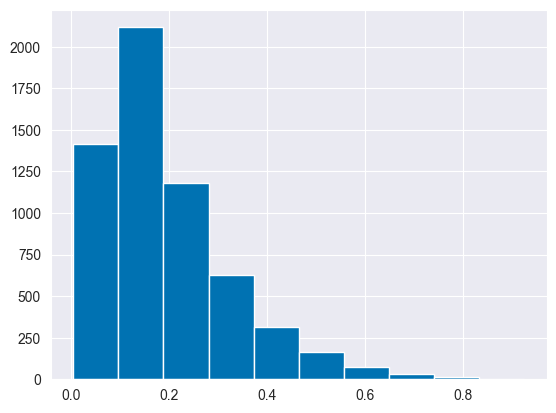

In [101]:
df_test.baseline_cat_cv_score.hist();

По порогу 0.5 вероятность ≈3.3%

In [102]:
model.predict(df_test).mean()

0.03315382026253787

In [103]:
df_test['baseline_cat_cv_pred'] = (df_test.baseline_cat_score > 0.5) * 1

In [104]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,baseline_cat_score,baseline_cat_pred,baseline_cat_cv_score,baseline_cat_cv_pred
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,Y,0.255018,0,0.195953,0
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,N,0.005462,0,0.028035,0
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,Y,0.091356,0,0.212274,0
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,Y,0.123879,0,0.100965,0
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,N,0.146871,0,0.166610,0


### Сохранение результатов

In [71]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_cv_pred
submission.to_csv('Cat_CV_LR_auto0.03.csv', index=False)

In [72]:
submission.head()

,id,smoking
0,19200,0
1,7784,0
2,11682,0
3,9949,0
4,9378,0


**Kaggle result:** 0.23138 ↓ LR=0.45

#### Изменяю порог до 0.2

In [73]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.2) * 1
submission.to_csv('Cat_CV_THRS02_LR_auto0.03.csv', index=False)

**Kaggle result:** 0.42861 ↑ LR = 0.45 - тот же что Baseline THRS 0.2

## Grid Search

In [125]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 350)
grid = {'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]}

In [126]:
%%time
model.grid_search(grid, pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0304513	test: 0.0347826	best: 0.0347826 (0)	total: 5.25ms	remaining: 5.24s
350:	learn: 0.0488865	test: 0.0177778	best: 0.0347826 (0)	total: 1.67s	remaining: 3.08s
700:	learn: 0.1765003	test: 0.0831601	best: 0.0833333 (696)	total: 3.35s	remaining: 1.43s
999:	learn: 0.2574448	test: 0.1061224	best: 0.1061224 (917)	total: 4.75s	remaining: 0us

bestTest = 0.106122449
bestIteration = 917

0:	loss: 0.1061224	best: 0.1061224 (0)	total: 4.81s	remaining: 48.1s
0:	learn: 0.0304513	test: 0.0347826	best: 0.0347826 (0)	total: 4.39ms	remaining: 4.38s
350:	learn: 0.4157205	test: 0.1627907	best: 0.1727447 (349)	total: 1.62s	remaining: 3s
700:	learn: 0.6397281	test: 0.2124542	best: 0.2189781 (695)	total: 3.25s	remaining: 1.39s
999:	learn: 0.7576910	test: 0.2411348	best: 0.2513274 (984)	total: 4.6s	remaining: 0us

bestTest = 0.2513274336
bestIteration = 984

1:	loss: 0.2513274	best: 0.2513274 (1)	total: 9.45s	remaining: 42.5s
0:	learn: 0.0304513	test: 0.0347826	best: 0.0347826 (0)	total: 4.35

{'params': {'learning_rate': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               4

In [127]:
model.get_params()

{'iterations': 1000, 'verbose': 350, 'eval_metric': 'F1', 'learning_rate': 0.5}

In [149]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 350)
grid = {'learning_rate': [0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65, 0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85]}

In [ ]:
%%time
model.grid_search(grid, pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0304513	test: 0.0347826	best: 0.0347826 (0)	total: 7.69ms	remaining: 7.68s
350:	learn: 0.9977654	test: 0.2827068	best: 0.2988166 (178)	total: 1.75s	remaining: 3.24s
700:	learn: 1.0000000	test: 0.2870229	best: 0.2988166 (178)	total: 3.38s	remaining: 1.44s
999:	learn: 1.0000000	test: 0.2900302	best: 0.2988166 (178)	total: 4.66s	remaining: 0us

bestTest = 0.298816568
bestIteration = 178

0:	loss: 0.2988166	best: 0.2988166 (0)	total: 4.73s	remaining: 1m 20s
0:	learn: 0.0304513	test: 0.0347826	best: 0.0347826 (0)	total: 4.45ms	remaining: 4.45s
350:	learn: 0.9988839	test: 0.2869693	best: 0.3050360 (317)	total: 1.65s	remaining: 3.05s
700:	learn: 1.0000000	test: 0.2745098	best: 0.3050360 (317)	total: 3.41s	remaining: 1.46s
999:	learn: 1.0000000	test: 0.2765957	best: 0.3050360 (317)	total: 4.72s	remaining: 0us

bestTest = 0.3050359712
bestIteration = 317

1:	loss: 0.3050360	best: 0.3050360 (1)	total: 9.48s	remaining: 1m 15s
0:	learn: 0.0304513	test: 0.0347826	best: 0.0347826 (0)	tot

In [ ]:
model.get_params()

#### Итого

Лучший Learning rate ≈ 0.75
F1 ≈ 0.34

## Catboost model comparison

In [120]:
%%time
model1 = CatBoostClassifier(
    learning_rate=0.05,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.05',
    custom_metric=['F1', 'AUC']
)

model2 = CatBoostClassifier(
    learning_rate=0.15,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.15',
    custom_metric=['F1', 'AUC']
)

model3 = CatBoostClassifier(
    learning_rate=0.25,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.25',
    custom_metric=['F1', 'AUC']
)

model4 = CatBoostClassifier(
    learning_rate=0.35,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.35',
    custom_metric=['F1', 'AUC']
)

model5 = CatBoostClassifier(
    learning_rate=0.47,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.47',
    custom_metric=['F1', 'AUC']
)

model6 = CatBoostClassifier(
    learning_rate=0.55,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.55',
    custom_metric=['F1', 'AUC']
)

model7 = CatBoostClassifier(
    learning_rate=0.65,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.65',
    custom_metric=['F1', 'AUC']
)

model8 = CatBoostClassifier(
    learning_rate=0.75,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.75',
    custom_metric=['F1', 'AUC']
)

model9 = CatBoostClassifier(
    learning_rate=0.85,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.85',
    custom_metric=['F1', 'AUC']
)

model10 = CatBoostClassifier(
    learning_rate=0.95,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.95',
    custom_metric=['F1', 'AUC']
)
model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model3.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model4.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model5.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model6.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model7.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model8.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model9.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model10.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

CPU times: total: 9min 56s
Wall time: 1min 22s


In [142]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['learning_rate_0.05', 'learning_rate_0.15', 'learning_rate_0.25', 'learning_rate_0.35', 'learning_rate_0.47', 'learning_rate_0.55', 'learning_rate_0.65', 'learning_rate_0.75', 'learning_rate_0.85', 'learning_rate_0.95']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: total: 156 ms
Wall time: 161 ms


In [152]:
%%time
model1 = CatBoostClassifier(
    learning_rate=0.57,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.57',
    custom_metric=['F1', 'AUC']
)

model2 = CatBoostClassifier(
    learning_rate=0.59,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.59',
    custom_metric=['F1', 'AUC']
)

model3 = CatBoostClassifier(
    learning_rate=0.61,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.61',
    custom_metric=['F1', 'AUC']
)

model4 = CatBoostClassifier(
    learning_rate=0.63,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.63',
    custom_metric=['F1', 'AUC']
)

model5 = CatBoostClassifier(
    learning_rate=0.67,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.67',
    custom_metric=['F1', 'AUC']
)

model6 = CatBoostClassifier(
    learning_rate=0.69,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.69',
    custom_metric=['F1', 'AUC']
)

model7 = CatBoostClassifier(
    learning_rate=0.65,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.65',
    custom_metric=['F1', 'AUC']
)

model8 = CatBoostClassifier(
    learning_rate=0.71,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.71',
    custom_metric=['F1', 'AUC']
)

model9 = CatBoostClassifier(
    learning_rate=0.73,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.73',
    custom_metric=['F1', 'AUC']
)

model10 = CatBoostClassifier(
    learning_rate=0.75,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.75',
    custom_metric=['F1', 'AUC']
)

model11 = CatBoostClassifier(
    learning_rate=0.77,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.77',
    custom_metric=['F1', 'AUC']
)

model12 = CatBoostClassifier(
    learning_rate=0.79,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.79',
    custom_metric=['F1', 'AUC']
)
model13 = CatBoostClassifier(
    learning_rate=0.81,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.81',
    custom_metric=['F1', 'AUC']
)

model14 = CatBoostClassifier(
    learning_rate=0.83,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.83',
    custom_metric=['F1', 'AUC']
)

model15 = CatBoostClassifier(
    learning_rate=0.85,
    iterations=1000,
    random_seed=659,
    train_dir='learning_rate_0.85',
    custom_metric=['F1', 'AUC']
)
model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model3.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model4.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model5.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model6.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model7.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model8.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model9.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model10.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model11.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model12.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model13.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model14.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model15.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

CPU times: total: 14min 51s
Wall time: 2min 6s


In [153]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['learning_rate_0.57', 'learning_rate_0.59', 'learning_rate_0.61', 'learning_rate_0.63', 'learning_rate_0.65', 'learning_rate_0.67', 'learning_rate_0.69', 'learning_rate_0.71', 'learning_rate_0.73', 'learning_rate_0.75', 'learning_rate_0.77', 'learning_rate_0.79', 'learning_rate_0.81', 'learning_rate_0.83', 'learning_rate_0.85']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: total: 297 ms
Wall time: 307 ms


In [155]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,8.007198
1,triglyceride,7.741460
2,waist_cm_,6.394003
3,id,6.267459
4,hemoglobin,6.050639
5,alt,5.955452
6,hdl,5.877987
7,ldl,5.579517
8,cholesterol,5.415752
9,ast,5.323827


#### Итого
Лучший Learning rate ≈ 0.75
F1 ≈ 0.34

## Baseline + ACW

In [157]:
X.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,0,N
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,0,Y
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,0,Y
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,0,Y
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,0,Y


In [158]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced'}

In [159]:
model = CatBoostClassifier(**parameters)

In [160]:
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057358
0:	learn: 0.6214208	test: 0.5905122	best: 0.5905122 (0)	total: 10ms	remaining: 10s
100:	learn: 0.7018482	test: 0.6066060	best: 0.6178075 (42)	total: 797ms	remaining: 7.09s
200:	learn: 0.7542315	test: 0.6127050	best: 0.6194924 (188)	total: 2.27s	remaining: 9.03s
300:	learn: 0.8067979	test: 0.6138486	best: 0.6199826 (203)	total: 3.23s	remaining: 7.5s
400:	learn: 0.8431059	test: 0.5923757	best: 0.6199826 (203)	total: 4.25s	remaining: 6.35s
500:	learn: 0.8760705	test: 0.5854236	best: 0.6199826 (203)	total: 5.26s	remaining: 5.24s
600:	learn: 0.8992444	test: 0.5671550	best: 0.6199826 (203)	total: 7.17s	remaining: 4.76s
700:	learn: 0.9208301	test: 0.5656466	best: 0.6199826 (203)	total: 8.23s	remaining: 3.51s
800:	learn: 0.9375248	test: 0.5391372	best: 0.6199826 (203)	total: 9.42s	remaining: 2.34s
900:	learn: 0.9487285	test: 0.5397044	best: 0.6199826 (203)	total: 10.5s	remaining: 1.15s
999:	learn: 0.9584354	test: 0.5279823	best: 0.6199826 (203)	total: 11.5s	remain

In [161]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,12.884232
1,age,10.890835
2,triglyceride,8.918779
3,alt,7.378423
4,hemoglobin,5.860802
5,waist_cm_,5.154544
6,ldl,4.929194
7,serum_creatinine,4.305889
8,systolic,4.125185
9,ast,3.907042


In [169]:
df_test['baseline_cat_score_acw'] = model.predict_proba(df_test)[:, 1]

In [170]:
df_test.baseline_cat_score_acw

0       0.524914
1       0.123723
2       0.561717
3       0.359324
4       0.583570
          ...   
5937    0.404504
5938    0.367365
5939    0.220777
5940    0.438935
5941    0.448414
Name: baseline_cat_score_acw, Length: 5942, dtype: float64

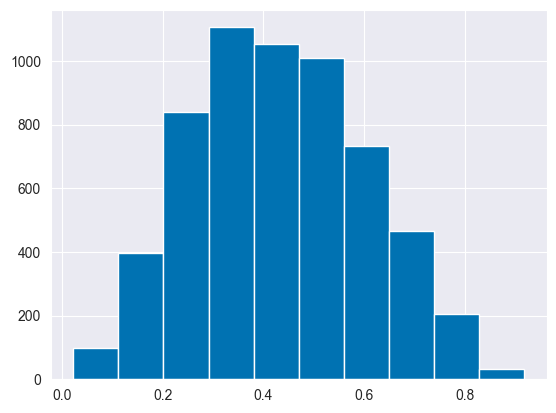

In [171]:
df_test.baseline_cat_score_acw.hist();

In [191]:
((df_test.baseline_cat_score_acw > 0.5) * 1).mean()

0.35711881521373273

In [192]:
model.predict(df_test).mean()

0.35711881521373273

In [193]:
df_test['baseline_cat_pred_acw'] = (df_test.baseline_cat_score_acw > 0.5) * 1

In [194]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,baseline_cat_score,baseline_cat_pred,baseline_cat_cv_score,baseline_cat_cv_pred,baseline_cat_score_acw,baseline_cat_pred_acw
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,Y,0.255018,0,0.195953,0,0.524914,1
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,N,0.005462,0,0.028035,0,0.123723,0
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,Y,0.091356,0,0.212274,0,0.561717,1
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,Y,0.123879,0,0.100965,0,0.359324,0
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,N,0.146871,0,0.166610,0,0.583570,1


### Сохранение результатов

In [198]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred_acw
submission.to_csv('Baseline_ACW_LR_auto.csv', index=False)

In [199]:
submission['smoking'].mean()

0.35711881521373273

**Kaggle result:** 0.43467 LR=auto + ACW

### Изменение порога

In [247]:
((df_test.baseline_cat_score_acw > 0.53) * 1).mean()

0.2977112083473578

In [248]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score_acw > 0.53) * 1
submission.to_csv('Baseline_ACW_threshold0.53_LRauto.csv', index=False)

In [249]:
submission.head()

,id,smoking
0,19200,0
1,7784,0
2,11682,1
3,9949,0
4,9378,1


In [250]:
submission['smoking'].mean()

0.2977112083473578

**Kaggle result:** 0.41734 ↓ LR = 0.057 auto,

### Grid Search

In [258]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 350,  auto_class_weights='Balanced', random_state=659)
grid = {'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]}

In [ ]:
%%time
model.grid_search(grid, pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5978094	test: 0.6236594	best: 0.6236594 (0)	total: 5.87ms	remaining: 5.87s
350:	learn: 0.6902507	test: 0.6561263	best: 0.6597371 (278)	total: 1.8s	remaining: 3.32s
700:	learn: 0.7312640	test: 0.6522408	best: 0.6606873 (484)	total: 3.39s	remaining: 1.45s
999:	learn: 0.7644145	test: 0.6521665	best: 0.6606873 (484)	total: 4.78s	remaining: 0us

bestTest = 0.6606872837
bestIteration = 484

0:	loss: 0.6606873	best: 0.6606873 (0)	total: 4.84s	remaining: 1m 36s
0:	learn: 0.5978094	test: 0.6236594	best: 0.6236594 (0)	total: 4.63ms	remaining: 4.62s
350:	learn: 0.8295163	test: 0.6190662	best: 0.6526218 (112)	total: 1.66s	remaining: 3.07s
700:	learn: 0.9282731	test: 0.5684051	best: 0.6526218 (112)	total: 3.43s	remaining: 1.46s
999:	learn: 0.9670536	test: 0.5407597	best: 0.6526218 (112)	total: 5.18s	remaining: 0us

bestTest = 0.652621816
bestIteration = 112

1:	loss: 0.6526218	best: 0.6606873 (0)	total: 10.1s	remaining: 1m 35s
0:	learn: 0.5978094	test: 0.6236594	best: 0.6236594 (0)	tota

350:	learn: 1.0000000	test: 0.4345991	best: 0.6460106 (3)	total: 1.7s	remaining: 3.14s
700:	learn: 1.0000000	test: 0.4315303	best: 0.6460106 (3)	total: 3.22s	remaining: 1.37s
999:	learn: 1.0000000	test: 0.4286916	best: 0.6460106 (3)	total: 4.44s	remaining: 0us

bestTest = 0.6460106437
bestIteration = 3

18:	loss: 0.6460106	best: 0.6623804 (13)	total: 1m 35s	remaining: 10.1s
0:	learn: 0.5978094	test: 0.6236594	best: 0.6236594 (0)	total: 4.82ms	remaining: 4.81s
350:	learn: 1.0000000	test: 0.4398189	best: 0.6333913 (8)	total: 1.73s	remaining: 3.2s


In [ ]:
model.get_params()

In [ ]:
%%time
model1 = CatBoostClassifier(
    learning_rate=0.2,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.2',
    custom_metric=['F1', 'AUC'],
    auto_class_weights='Balanced'
)

model2 = CatBoostClassifier(
    learning_rate=0.3,
    iterations=1000,
    random_state=659,
    train_dir='learning_rate_0.3',
    custom_metric=['F1', 'AUC'],
    auto_class_weights='Balanced'
)
model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)
model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

In [ ]:
%%time
from catboost import MetricVisualizer

MetricVisualizer(['learning_rate_0.2', 'learning_rate_0.3']).start()

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
model = CatBoostClassifier(iterations=1000, eval_metric='F1', verbose = 350, auto_class_weights='Balanced', random_state=659)
grid = {'learning_rate': [0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65, 0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85]}

In [ ]:
%%time
model.grid_search(grid, pool, plot=True)

In [ ]:
model.get_params()